In [10]:
import random
import numpy as np
import pandas as pd
import sympy as sp
from sklearn import datasets
from matplotlib import pyplot as plt

In [4]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = pd.Series(diabetes.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
y = df['target'].values.reshape(-1,1)
x = df[['age', 'bmi', 'sex', 'bp']]
y = np.transpose(y)
x = np.transpose(x).values

In [12]:
m, n = np.shape(x)
numIterations= 2000
alpha = 0.05
theta = np.ones(m).reshape(1, m)

In [13]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    counter_it = list()
    counter_cost = list()
    for i in range(0, numIterations):
        #hypothesis = x.dot(theta).values.reshape(-1,1)
        hypothesis = (theta @ x).reshape(1,n)
        loss = (hypothesis - y)
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        
        counter_it.append(i)
        counter_cost.append(cost)
        
        ###plt.scatter(i, cost)
        # avg gradient per example
        gradient = (loss @ xTrans) / m
        # update
        theta = theta - alpha * gradient
        #plt.scatter(range(1,1001), cost)
    plt.scatter(counter_it, counter_cost)
    #return cost
    return theta
    #plt.scatter(range(1,1001), cost)

Iteration 0 | Cost: 1605856.460876
Iteration 1 | Cost: 1601206.787116
Iteration 2 | Cost: 1596735.416731
Iteration 3 | Cost: 1592435.170130
Iteration 4 | Cost: 1588299.165362
Iteration 5 | Cost: 1584320.805580
Iteration 6 | Cost: 1580493.767022
Iteration 7 | Cost: 1576811.987518
Iteration 8 | Cost: 1573269.655476
Iteration 9 | Cost: 1569861.199340
Iteration 10 | Cost: 1566581.277493
Iteration 11 | Cost: 1563424.768591
Iteration 12 | Cost: 1560386.762309
Iteration 13 | Cost: 1557462.550478
Iteration 14 | Cost: 1554647.618595
Iteration 15 | Cost: 1551937.637700
Iteration 16 | Cost: 1549328.456592
Iteration 17 | Cost: 1546816.094381
Iteration 18 | Cost: 1544396.733344
Iteration 19 | Cost: 1542066.712103
Iteration 20 | Cost: 1539822.519071
Iteration 21 | Cost: 1537660.786191
Iteration 22 | Cost: 1535578.282935
Iteration 23 | Cost: 1533571.910554
Iteration 24 | Cost: 1531638.696578
Iteration 25 | Cost: 1529775.789541
Iteration 26 | Cost: 1527980.453937
Iteration 27 | Cost: 1526250.065384
It

Iteration 312 | Cost: 1475277.109262
Iteration 313 | Cost: 1475276.105561
Iteration 314 | Cost: 1475275.123342
Iteration 315 | Cost: 1475274.162138
Iteration 316 | Cost: 1475273.221490
Iteration 317 | Cost: 1475272.300950
Iteration 318 | Cost: 1475271.400080
Iteration 319 | Cost: 1475270.518450
Iteration 320 | Cost: 1475269.655642
Iteration 321 | Cost: 1475268.811247
Iteration 322 | Cost: 1475267.984863
Iteration 323 | Cost: 1475267.176099
Iteration 324 | Cost: 1475266.384572
Iteration 325 | Cost: 1475265.609907
Iteration 326 | Cost: 1475264.851739
Iteration 327 | Cost: 1475264.109707
Iteration 328 | Cost: 1475263.383464
Iteration 329 | Cost: 1475262.672665
Iteration 330 | Cost: 1475261.976976
Iteration 331 | Cost: 1475261.296069
Iteration 332 | Cost: 1475260.629625
Iteration 333 | Cost: 1475259.977329
Iteration 334 | Cost: 1475259.338875
Iteration 335 | Cost: 1475258.713965
Iteration 336 | Cost: 1475258.102304
Iteration 337 | Cost: 1475257.503606
Iteration 338 | Cost: 1475256.917590
I

Iteration 934 | Cost: 1475229.132531
Iteration 935 | Cost: 1475229.132515
Iteration 936 | Cost: 1475229.132499
Iteration 937 | Cost: 1475229.132483
Iteration 938 | Cost: 1475229.132467
Iteration 939 | Cost: 1475229.132452
Iteration 940 | Cost: 1475229.132436
Iteration 941 | Cost: 1475229.132421
Iteration 942 | Cost: 1475229.132406
Iteration 943 | Cost: 1475229.132392
Iteration 944 | Cost: 1475229.132377
Iteration 945 | Cost: 1475229.132363
Iteration 946 | Cost: 1475229.132349
Iteration 947 | Cost: 1475229.132335
Iteration 948 | Cost: 1475229.132322
Iteration 949 | Cost: 1475229.132308
Iteration 950 | Cost: 1475229.132295
Iteration 951 | Cost: 1475229.132282
Iteration 952 | Cost: 1475229.132269
Iteration 953 | Cost: 1475229.132256
Iteration 954 | Cost: 1475229.132244
Iteration 955 | Cost: 1475229.132232
Iteration 956 | Cost: 1475229.132219
Iteration 957 | Cost: 1475229.132207
Iteration 958 | Cost: 1475229.132196
Iteration 959 | Cost: 1475229.132184
Iteration 960 | Cost: 1475229.132173
I

Iteration 1179 | Cost: 1475229.131405
Iteration 1180 | Cost: 1475229.131404
Iteration 1181 | Cost: 1475229.131404
Iteration 1182 | Cost: 1475229.131403
Iteration 1183 | Cost: 1475229.131403
Iteration 1184 | Cost: 1475229.131402
Iteration 1185 | Cost: 1475229.131402
Iteration 1186 | Cost: 1475229.131401
Iteration 1187 | Cost: 1475229.131401
Iteration 1188 | Cost: 1475229.131400
Iteration 1189 | Cost: 1475229.131400
Iteration 1190 | Cost: 1475229.131399
Iteration 1191 | Cost: 1475229.131399
Iteration 1192 | Cost: 1475229.131398
Iteration 1193 | Cost: 1475229.131398
Iteration 1194 | Cost: 1475229.131398
Iteration 1195 | Cost: 1475229.131397
Iteration 1196 | Cost: 1475229.131397
Iteration 1197 | Cost: 1475229.131396
Iteration 1198 | Cost: 1475229.131396
Iteration 1199 | Cost: 1475229.131396
Iteration 1200 | Cost: 1475229.131395
Iteration 1201 | Cost: 1475229.131395
Iteration 1202 | Cost: 1475229.131394
Iteration 1203 | Cost: 1475229.131394
Iteration 1204 | Cost: 1475229.131394
Iteration 12

Iteration 1507 | Cost: 1475229.131367
Iteration 1508 | Cost: 1475229.131367
Iteration 1509 | Cost: 1475229.131367
Iteration 1510 | Cost: 1475229.131367
Iteration 1511 | Cost: 1475229.131367
Iteration 1512 | Cost: 1475229.131367
Iteration 1513 | Cost: 1475229.131367
Iteration 1514 | Cost: 1475229.131367
Iteration 1515 | Cost: 1475229.131367
Iteration 1516 | Cost: 1475229.131367
Iteration 1517 | Cost: 1475229.131367
Iteration 1518 | Cost: 1475229.131367
Iteration 1519 | Cost: 1475229.131367
Iteration 1520 | Cost: 1475229.131367
Iteration 1521 | Cost: 1475229.131367
Iteration 1522 | Cost: 1475229.131367
Iteration 1523 | Cost: 1475229.131367
Iteration 1524 | Cost: 1475229.131367
Iteration 1525 | Cost: 1475229.131367
Iteration 1526 | Cost: 1475229.131367
Iteration 1527 | Cost: 1475229.131367
Iteration 1528 | Cost: 1475229.131367
Iteration 1529 | Cost: 1475229.131367
Iteration 1530 | Cost: 1475229.131367
Iteration 1531 | Cost: 1475229.131367
Iteration 1532 | Cost: 1475229.131367
Iteration 15

Iteration 1729 | Cost: 1475229.131367
Iteration 1730 | Cost: 1475229.131367
Iteration 1731 | Cost: 1475229.131367
Iteration 1732 | Cost: 1475229.131367
Iteration 1733 | Cost: 1475229.131367
Iteration 1734 | Cost: 1475229.131367
Iteration 1735 | Cost: 1475229.131367
Iteration 1736 | Cost: 1475229.131367
Iteration 1737 | Cost: 1475229.131367
Iteration 1738 | Cost: 1475229.131367
Iteration 1739 | Cost: 1475229.131367
Iteration 1740 | Cost: 1475229.131367
Iteration 1741 | Cost: 1475229.131367
Iteration 1742 | Cost: 1475229.131367
Iteration 1743 | Cost: 1475229.131367
Iteration 1744 | Cost: 1475229.131367
Iteration 1745 | Cost: 1475229.131367
Iteration 1746 | Cost: 1475229.131367
Iteration 1747 | Cost: 1475229.131367
Iteration 1748 | Cost: 1475229.131367
Iteration 1749 | Cost: 1475229.131367
Iteration 1750 | Cost: 1475229.131367
Iteration 1751 | Cost: 1475229.131367
Iteration 1752 | Cost: 1475229.131367
Iteration 1753 | Cost: 1475229.131367
Iteration 1754 | Cost: 1475229.131367
Iteration 17

[[  37.24118781  787.17926963 -106.57753697  416.67383602]]


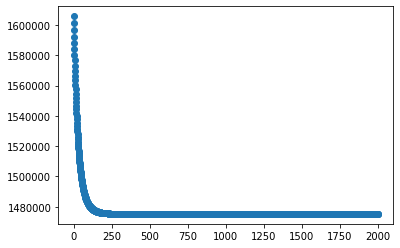

In [14]:
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)